<a href="https://colab.research.google.com/github/Dhananjana97/ML-Ride-Fair/blob/master/preprocess_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import common Modules

In [0]:
import pandas as pd
import numpy as np
import xlrd


import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

from datetime import datetime




# FileLoad

In [3]:
train_df=pd.read_csv('/content/drive/My Drive/ML Project/train.csv');
test_df=pd.read_csv('/content/drive/My Drive/ML Project/test.csv');
submission_df=pd.read_csv('/content/drive/My Drive/ML Project/sample_submission.csv')
train_df.drop_duplicates(inplace = True)
test_df.drop_duplicates(inplace = True)
train_df

# train_df = train_df[train_df['duration']!=0]
train_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct


# Seperate label clumn

In [4]:
lbl=[]
for index, row in train_df.iterrows():
  label=row['label']
  
  if(label=="correct"):
    lbl.append(1)
  elif(label=="incorrect"):
    lbl.append(0)
lbl

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [0]:
train_df['lb']=lbl


In [6]:
train_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,lb
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,1
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct,1
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct,1
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct,1
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct,1


In [7]:
labels_df=pd.DataFrame(train_df['lb'])
features_df=train_df.drop(labels=['label','lb'],axis=1)
features_df

features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31


#Import model related modules

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from pprint import pprint
from sklearn.metrics import fbeta_score
from math import radians, cos, sin, asin, sqrt 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Calc Distance 

In [0]:


def getDistance(df):
  # The math module contains a function named 
    # radians which converts from degrees to radians. 
  dist=[]
  for index, row in df.iterrows():
    lon1 = radians(row['pick_lon']) 
    lon2 = radians(row['drop_lon']) 
    lat1 = radians(row['pick_lat']) 
    lat2 = radians(row['drop_lat']) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    distance=c * r
    dist.append(distance)
  
  return dist
      
      


In [10]:
getDistance(features_df)

[5.092769918614749,
 3.1680575840028093,
 6.305395096498956,
 0.8619461197905727,
 8.14778220061441,
 24.207039248887845,
 4.77762352223266,
 5.322543700241312,
 1.0353018356743493,
 2.930715230104055,
 14.381001132845066,
 4.515655217602484,
 9.424518630693273,
 1.4822326128545675,
 1.4400702368954967,
 13.134533272021095,
 5.123992648484041,
 1.2646648169662118,
 9.946708664968586,
 2.4989545167381277,
 2.2814676303202774,
 16.783013705293456,
 1.9297374974341521,
 4.2524115423095665,
 8.774419577321087,
 2.158639601316546,
 0.22512869093339952,
 1.5586563952189847,
 5.044182192380528,
 4.332270836375877,
 2.7020831310547613,
 2.4344507883203668,
 6.095000666312774,
 9.932622235546958,
 0.7754995733372814,
 1.1968734616119863,
 1.955358507262967,
 7.221149247721649,
 6.4991273847408655,
 2.7143833765541463,
 10.804860544656814,
 0.7983078488963857,
 1.5689911732292072,
 0.7124683760151019,
 2.4514238318216366,
 1.7361632222406627,
 0.6001069791989461,
 0.01236083468686051,
 5.5632191

In [11]:
features_df['dist']=getDistance(features_df)
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,5.092770
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,3.168058
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,6.305395
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.861946
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,8.147782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,2.105376
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,10.868377
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1.045518
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,2.879077


# difference between fare_per_dist and fare_per_min

In [0]:


def get_fare_diff(df):
  fare_per_diff=[]
  for index, row in df.iterrows():
    if(row['Fare_per_dist']==0 or row['Fare_per_min']==0):
     
      fare_per_diff.append(0)
      # print('!!!!!!!')
    
    else:
      fare_diff=(float(row['Fare_per_dist']))/(float(row['Fare_per_min']))

      if(float(row['Fare_per_dist'])>float(row['Fare_per_min'])):
        fare_diff=fare_diff
        # print('aaaaaaaa')
      else:
        fare_diff=0-fare_diff
        # print('zzzzzzzz',index,fare_diff)
  
      fare_per_diff.append(fare_diff)
  
   
  # print(len(fare_per_diff))      
    
    
  
  return fare_per_diff


# get_fare_diff(features_df)

In [66]:
features_df['Fare_diff']=get_fare_diff(features_df)
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist,Fare_per_dist,Fare_per_min,label,Fare_diff
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,5.092770,51.017424,19.447482,1,2.623343
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,3.168058,59.137183,15.007585,1,3.940486
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,6.305395,46.173157,16.649862,1,2.773186
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.861946,65.127273,8.257525,1,7.887021
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,8.147782,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,2.105376,86.605971,14.195227,1,6.101063
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,10.868377,52.512899,16.212831,1,3.238972
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1.045518,62.839636,17.384030,1,3.614791
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,2.879077,42.656035,9.322378,1,4.575660


# make bins of pickup time

In [0]:
# # datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
# def get_time_type(df):
#   pickup_slot=[]
#   both="Both"
#   school="School"
#   office="Office"
#   free="free"
#   for index, row in df.iterrows():
#     pickup_datetime=row['pickup_time']
#     both_start="6:00"
#     both_end="9:30"
#     school_start="13:30"
#     school_end="14:30"
#     office_start="16:30"
#     office_end="19:30"

#     pickup_time=datetime.strptime(pickup_datetime.split(" ")[1],'%H:%M')
#     both_start_time=datetime.strptime(both_start,'%H:%M')
#     both_end_time=datetime.strptime(both_end,'%H:%M')
#     school_start_time=datetime.strptime(school_start,'%H:%M')
#     school_end_time=datetime.strptime(school_end,'%H:%M')
#     office_start_time=datetime.strptime(office_start,'%H:%M')
#     office_end_time=datetime.strptime(office_end,'%H:%M')
    
#     if(pickup_time> both_start_time and pickup_time<both_end_time):
#       pickup_slot.append(both)
#       # print(pickup_time,both)
#     elif(pickup_time> school_start_time and pickup_time<school_end_time):
#       pickup_slot.append(school)
#       # print(pickup_time,school)
#     elif(pickup_time>office_start_time and pickup_time<office_end_time):
#       pickup_slot.append(office)
#       # print(pickup_time,office)
#     else:
#       pickup_slot.append(free)
#       # print(pickup_time,free)
    

    
#   return pickup_slot

In [0]:
# features_df['Time_type']=get_time_type(features_df)
# features_df

# fare per distance

In [0]:


def get_fare_per_distance(df):
  fare_per_dist=[]
  for index, row in df.iterrows():
    if(row['dist']==0):
     
      fare_per_dist.append(0)
    else:
      fare_per_distance=(float(row['fare'])-(float(row['meter_waiting_fare'])+float(row['additional_fare'])))/float(row['dist'])
      
      fare_per_dist.append(fare_per_distance)
  
  return fare_per_dist




In [15]:
get_fare_per_distance(features_df)

[51.01742355379603,
 59.13718265287499,
 46.17315735879172,
 65.12727270428391,
 nan,
 43.562535226130485,
 53.608242425998235,
 54.55126652822712,
 82.25234136142836,
 72.81621831010278,
 47.55371296356379,
 49.84658685246301,
 46.88727534166849,
 67.9448010565946,
 80.40371714758415,
 44.0179630312083,
 55.03911560908212,
 67.061247266647,
 45.31649766595668,
 86.45215371186342,
 nan,
 40.6512210488641,
 46.10792924856668,
 52.18523602244639,
 46.796257733250904,
 92.68800585237666,
 392.7229338625503,
 57.03733053205078,
 41.42990717418455,
 38.72334079194784,
 nan,
 nan,
 49.02926453341669,
 52.54318284040338,
 690.3807795741332,
 100.16597731102988,
 49.7555817199899,
 57.25404444873436,
 47.45954060297256,
 43.805308058932596,
 50.1431737837583,
 83.24633171510443,
 61.88052658076779,
 70.17855343931808,
 42.574114947085846,
 97.8067026329749,
 65.13805263884632,
 4045.0342769448803,
 77.78654589571455,
 37.66614080892729,
 36.80712573086501,
 48.78894307550188,
 43.6946067315633

In [16]:
features_df['Fare_per_dist']=get_fare_per_distance(features_df)
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist,Fare_per_dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,5.092770,51.017424
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,3.168058,59.137183
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,6.305395,46.173157
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.861946,65.127273
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,8.147782,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,2.105376,86.605971
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,10.868377,52.512899
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1.045518,62.839636
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,2.879077,42.656035


#Fare per min

In [0]:


def get_fare_per_min(df):
  fare_per_min=[]
  for index, row in df.iterrows():
    if(row['duration']==0):
     
      fare_per_min.append(0)
    else:
      fare_per_minute=(float(row['fare']))/(float(row['duration'])/60.0)

      fare_per_min.append(fare_per_minute)
   
        
    
    
  
  return fare_per_min




In [18]:
get_fare_per_min(features_df)

[19.447482014388488,
 15.007585335018963,
 16.64986200551978,
 8.25752508361204,
 nan,
 18.75585559142941,
 12.83884430176565,
 14.315828957239312,
 16.72,
 10.054191033138402,
 1602.3923076923077,
 455.9806451612903,
 13.497463948284436,
 5.295714285714285,
 22.722985074626866,
 9.564605543710023,
 12.441032608695652,
 20.135915492957746,
 11.365503080082135,
 15.255218855218855,
 nan,
 13.087216624685139,
 9.468398268398268,
 16.605882352941176,
 17.50977130977131,
 35.2927374301676,
 10.594099378881987,
 10.36893203883495,
 9.359488272921109,
 18.601043478260866,
 nan,
 nan,
 12.145088161209069,
 12.853745541022594,
 114.52237762237762,
 14.762011173184359,
 18.74608695652174,
 13.444186046511627,
 10.599590163934426,
 13.926881720430108,
 11.639409905163328,
 15.057585139318885,
 14.908545034642033,
 19.30851063829787,
 5.0784953867991485,
 4.499058219178083,
 7.4751515151515155,
 2.47612551159618,
 14.320165033522432,
 10.18868778280543,
 7.993742177722153,
 19.592727272727274,
 1

In [19]:
features_df['Fare_per_min']=get_fare_per_min(features_df)
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist,Fare_per_dist,Fare_per_min
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,5.092770,51.017424,19.447482
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,3.168058,59.137183,15.007585
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,6.305395,46.173157,16.649862
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.861946,65.127273,8.257525
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,8.147782,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,2.105376,86.605971,14.195227
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,10.868377,52.512899,16.212831
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1.045518,62.839636,17.384030
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,2.879077,42.656035,9.322378


# difference between fare_per_dist and fare_per_min

In [0]:


def get_fare_diff(df):
  fare_per_diff=[]
  for index, row in df.iterrows():
    if(row['Fare_per_dist']==0 and row['Fare_per_min']==0):
     
      fare_per_diff.append(0)
    else:
      fare_diff=(float(row['Fare_per_dist']))/(float(row['Fare_per_min']))

      fare_per_diff.append(fare_diff)
   
        
    
    
  
  return fare_per_diff




In [0]:
features_df['Fare_diff']=get_fare_diff(features_df)
features_df

# pickup hour

In [0]:
# datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
def get_pickup_hour(df):
  pickup_hour=[]
 
  for index, row in df.iterrows():
    pickup_datetime=row['pickup_time']
    

    pickup_time=pickup_datetime.split(" ")[1];
    pickup_h=pickup_time.split(":")[0]
    pickup_hour.append(pickup_h)
   
    
   
    

    
  return pickup_hour

get_pickup_hour(features_df)

In [0]:
features_df['pickup_hour']=get_pickup_hour(features_df)
features_df

# Graphs

In [67]:
features_df['label']=labels_df['lb']
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist,Fare_per_dist,Fare_per_min,label,Fare_diff
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,5.092770,51.017424,19.447482,1,2.623343
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,3.168058,59.137183,15.007585,1,3.940486
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,6.305395,46.173157,16.649862,1,2.773186
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.861946,65.127273,8.257525,1,7.887021
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,8.147782,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,2.105376,86.605971,14.195227,1,6.101063
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,10.868377,52.512899,16.212831,1,3.238972
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1.045518,62.839636,17.384030,1,3.614791
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,2.879077,42.656035,9.322378,1,4.575660


# fare permin

277.6260090351732 340.9009112932408
664.9525194805203 1658.1618533991104


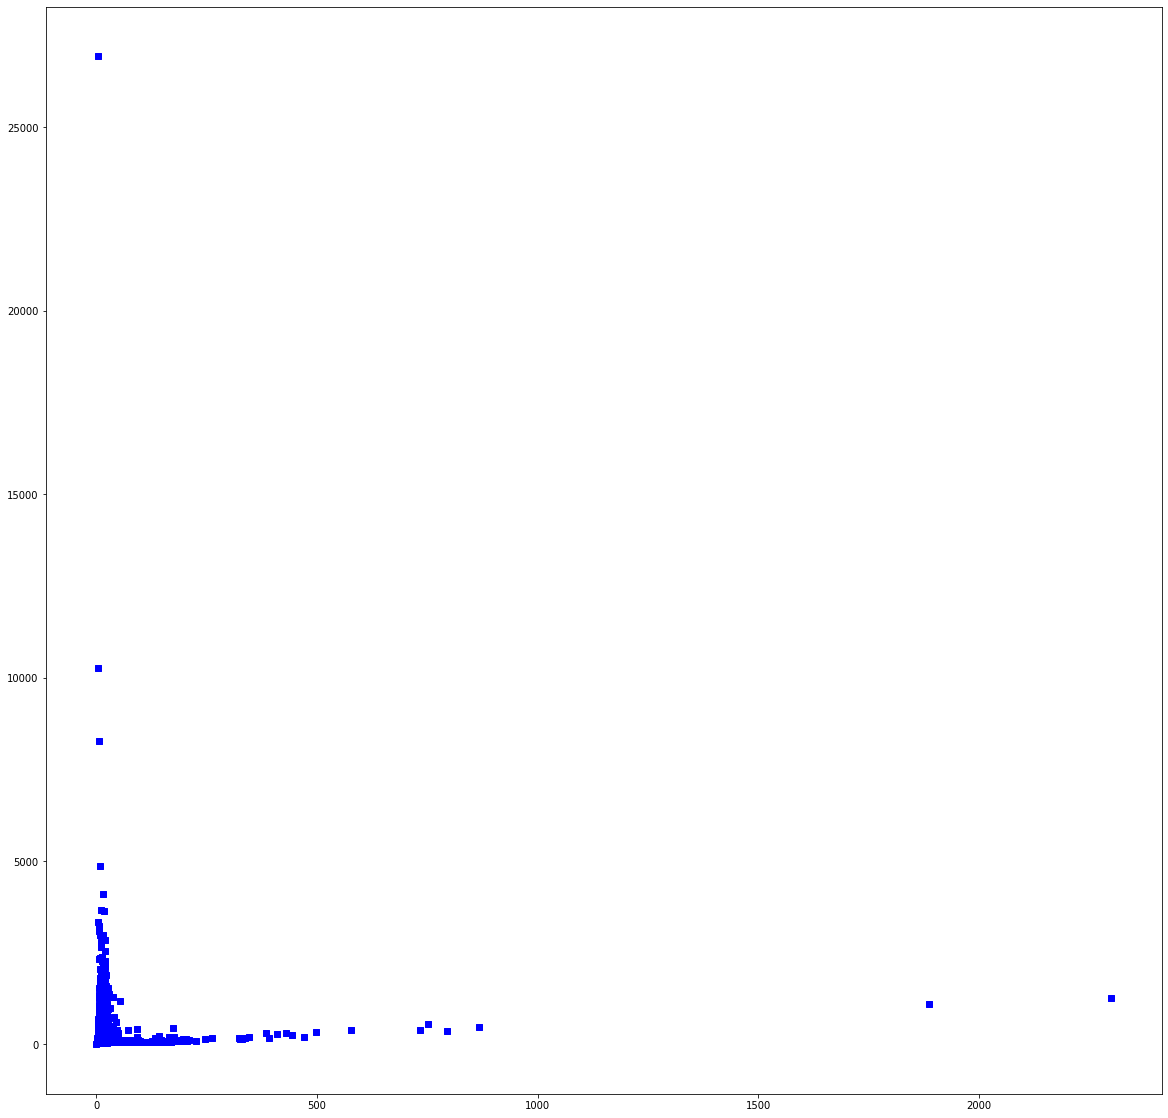

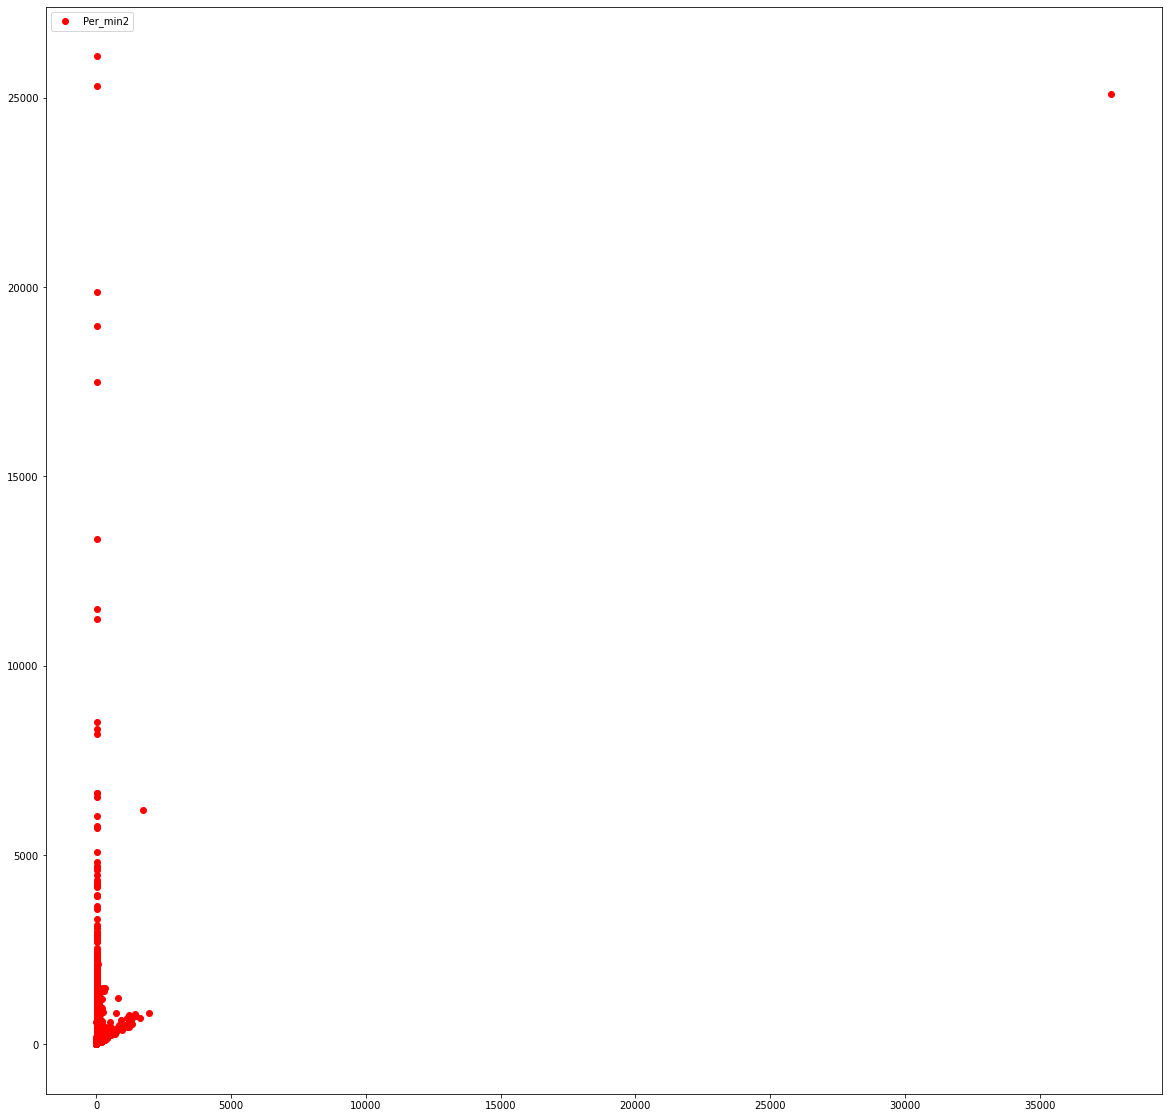

In [72]:
fare_min=features_df[features_df['label']==1]['Fare_per_min']
fare=features_df[features_df['label']==1]['fare']
print(fare.mean(),fare.std())
fare_min2=features_df[features_df['label']==0]['Fare_per_min']
fare2=features_df[features_df['label']==0]['fare']
print(fare2.mean(),fare2.std())

fig1 = plt.figure(figsize=(20,20))
fig2=plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111)
ax2=fig2.add_subplot(111)
ax1.scatter(fare_min, fare, c='b', marker="s", label='per_min')
ax2.scatter(fare_min2,fare2, c='r', marker="o", label='Per_min2')
plt.legend(loc='upper left');
plt.show()

# fare diff

277.6260090351732 340.9009112932408
664.9525194805203 1658.1618533991104


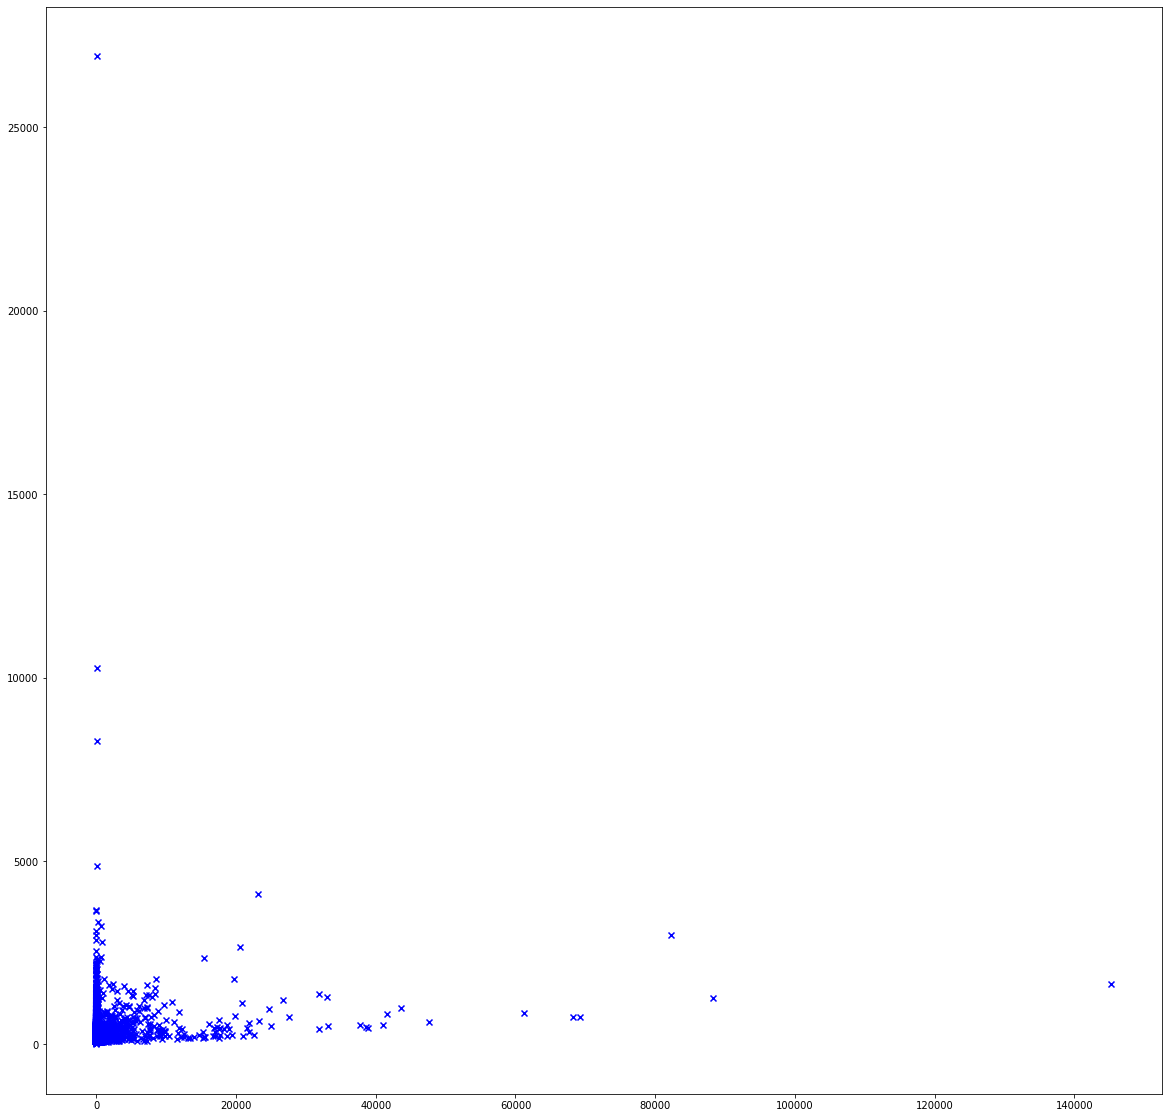

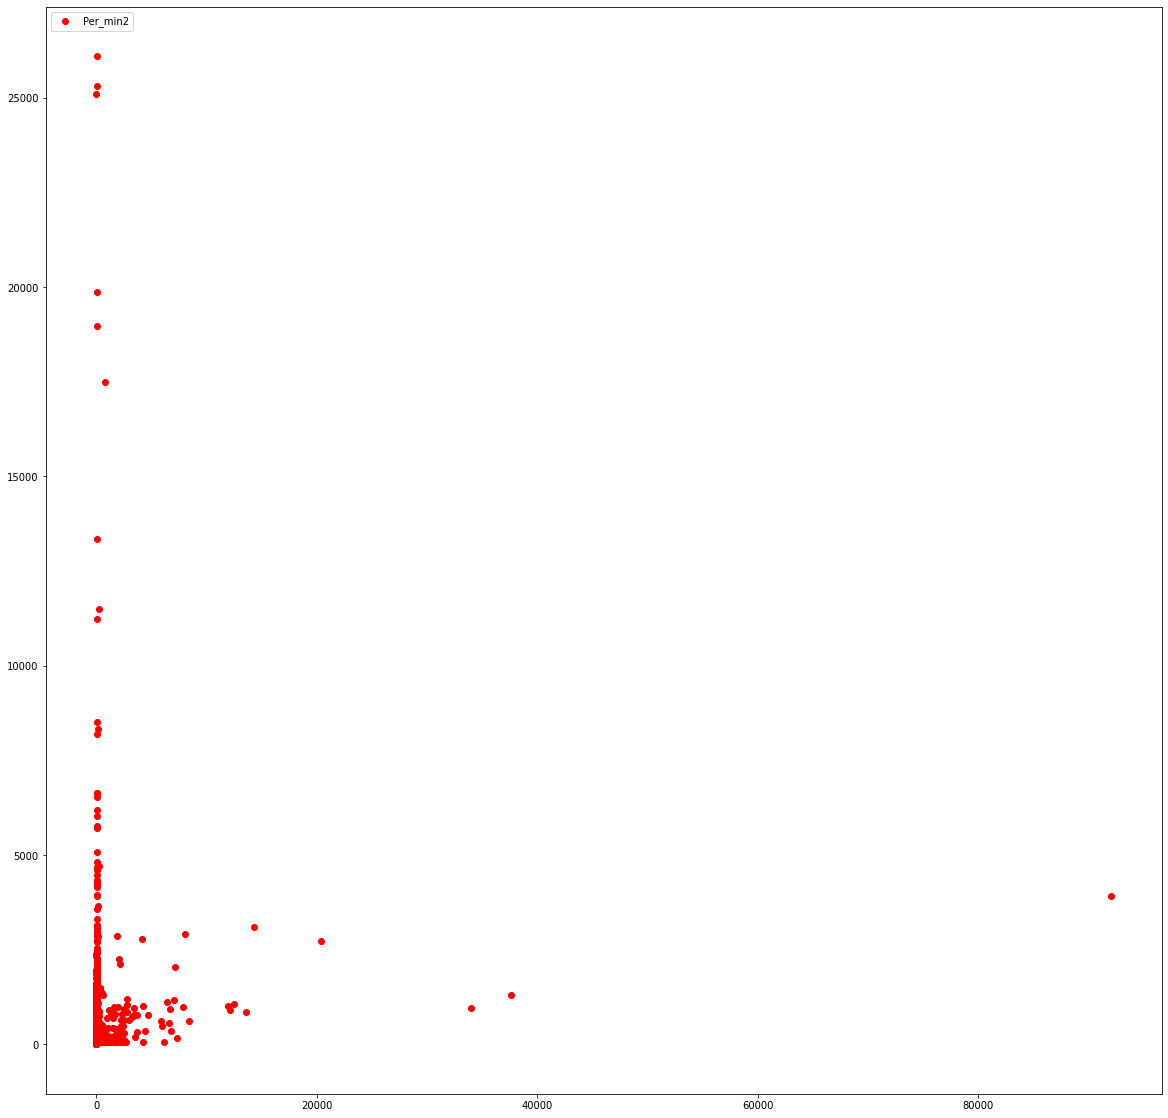

In [73]:
fare_min=features_df[features_df['label']==1]['Fare_diff']
fare=features_df[features_df['label']==1]['fare']
print(fare.mean(),fare.std())
fare_min2=features_df[features_df['label']==0]['Fare_diff']
fare2=features_df[features_df['label']==0]['fare']
print(fare2.mean(),fare2.std())

fig1 = plt.figure(figsize=(20,20))
fig2=plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111)
ax2=fig2.add_subplot(111)
ax1.scatter(fare_min, fare, c='b', marker="x", label='per_min')
ax2.scatter(fare_min2,fare2, c='r', marker="o", label='Per_min2')
plt.legend(loc='upper left');
plt.show()

# pickup hour

In [0]:
# datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
def get_pickup_hour(df):
  pickup_hour=[]
 
  for index, row in df.iterrows():
    pickup_datetime=row['pickup_time']
    

    pickup_time=pickup_datetime.split(" ")[1];
    pickup_h=pickup_time.split(":")[0]
    pickup_hour.append(pickup_h)
   
    
   
    

    
  return pickup_hour

get_pickup_hour(features_df)

In [76]:
features_df['pickup_hour']=get_pickup_hour(features_df)
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist,Fare_per_dist,Fare_per_min,label,Fare_diff,pickup_hour
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,5.092770,51.017424,19.447482,1,2.623343,0
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,3.168058,59.137183,15.007585,1,3.940486,0
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,6.305395,46.173157,16.649862,1,2.773186,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.861946,65.127273,8.257525,1,7.887021,2
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,8.147782,NaN,NaN,1,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,2.105376,86.605971,14.195227,1,6.101063,22
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,10.868377,52.512899,16.212831,1,3.238972,23
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1.045518,62.839636,17.384030,1,3.614791,23
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,2.879077,42.656035,9.322378,1,4.575660,23


277.6260090351732 340.9009112932408
664.9525194805203 1658.1618533991104


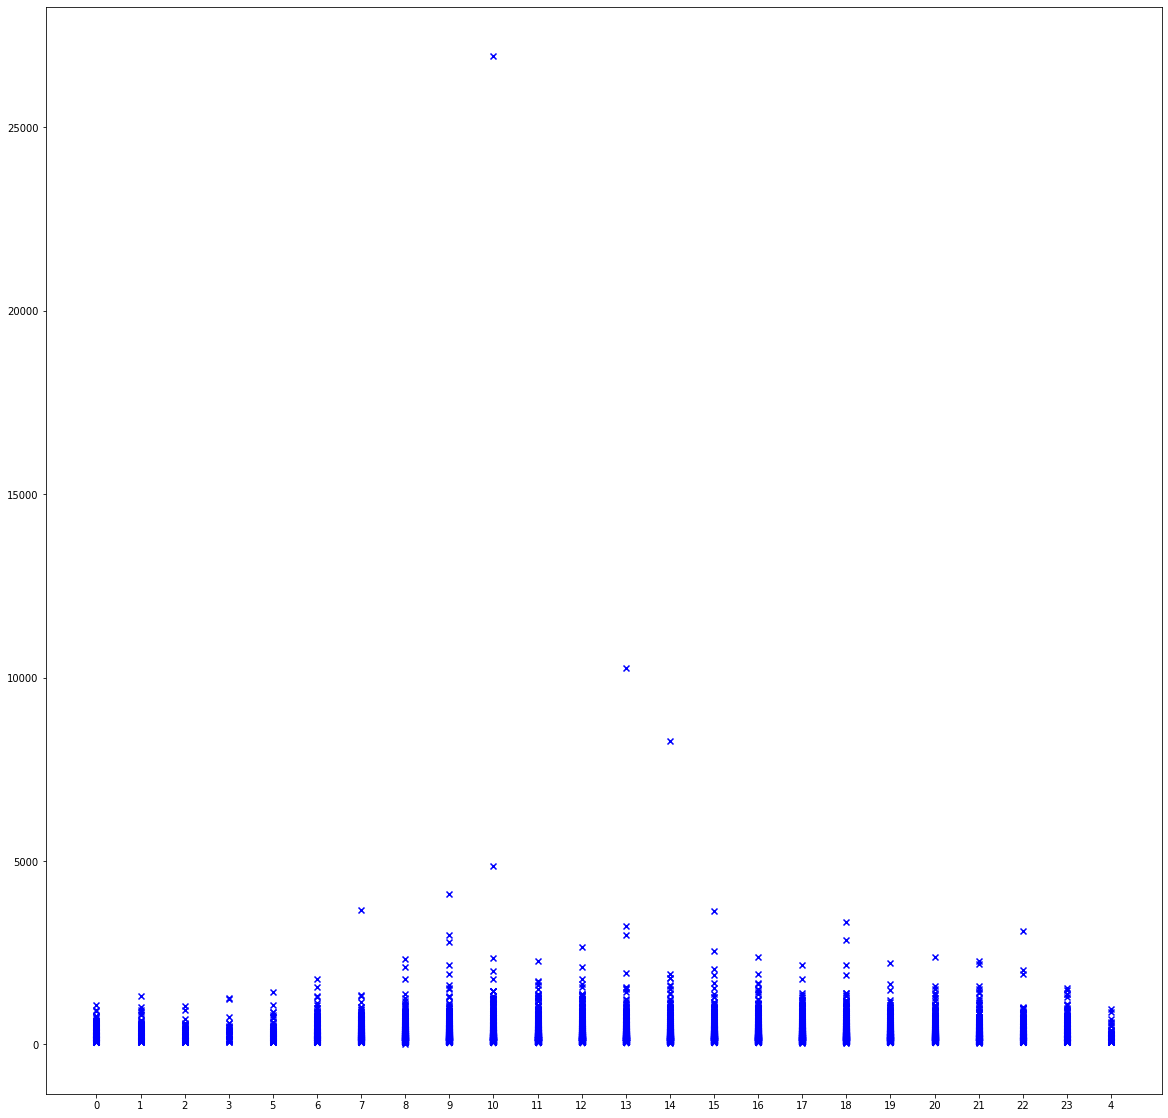

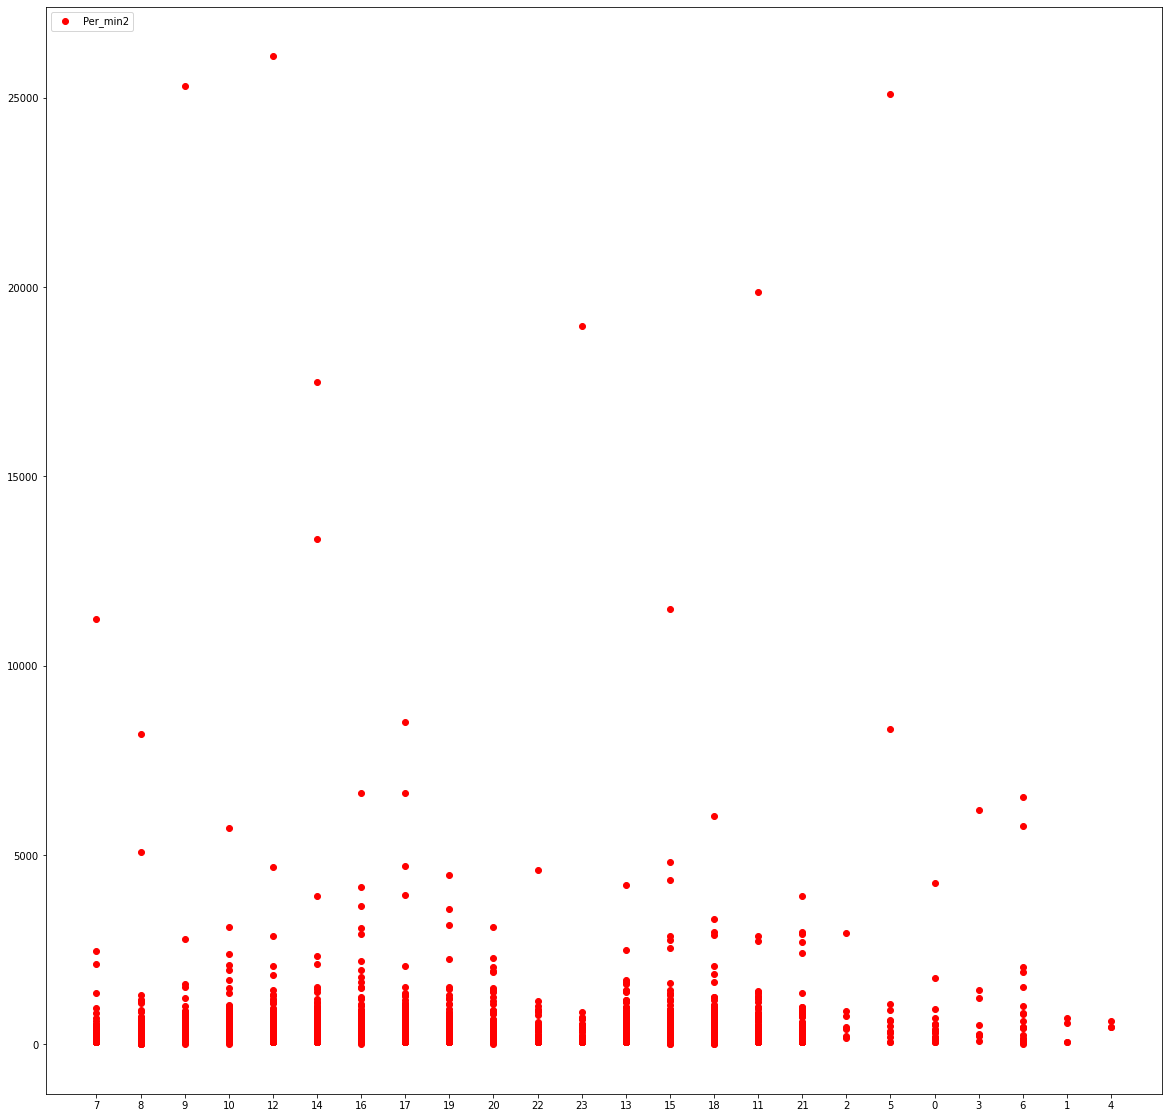

In [77]:
fare_min=features_df[features_df['label']==1]['pickup_hour']
fare=features_df[features_df['label']==1]['fare']
print(fare.mean(),fare.std())
fare_min2=features_df[features_df['label']==0]['pickup_hour']
fare2=features_df[features_df['label']==0]['fare']
print(fare2.mean(),fare2.std())

fig1 = plt.figure(figsize=(20,20))
fig2=plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111)
ax2=fig2.add_subplot(111)
ax1.scatter(fare_min, fare, c='b', marker="x", label='per_min')

ax2.scatter(fare_min2,fare2, c='r', marker="o", label='Per_min2')
plt.legend(loc='upper left');
plt.show()

# meter waiting and meter waiting fare

No handles with labels found to put in legend.


16.909938094385264 231.323228480677
185.04003788627875 1356.5905379468766


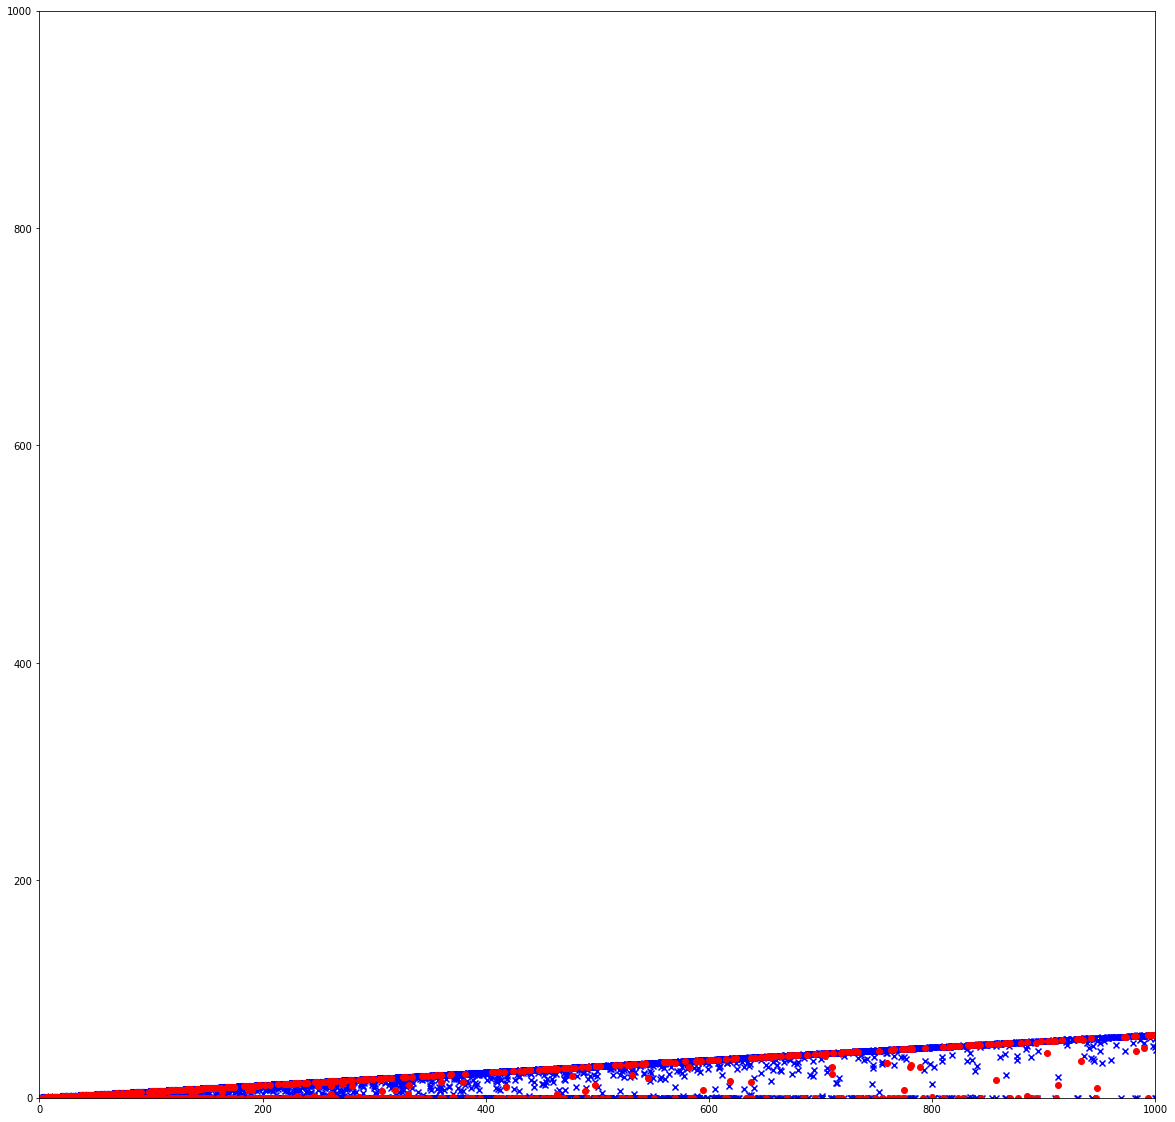

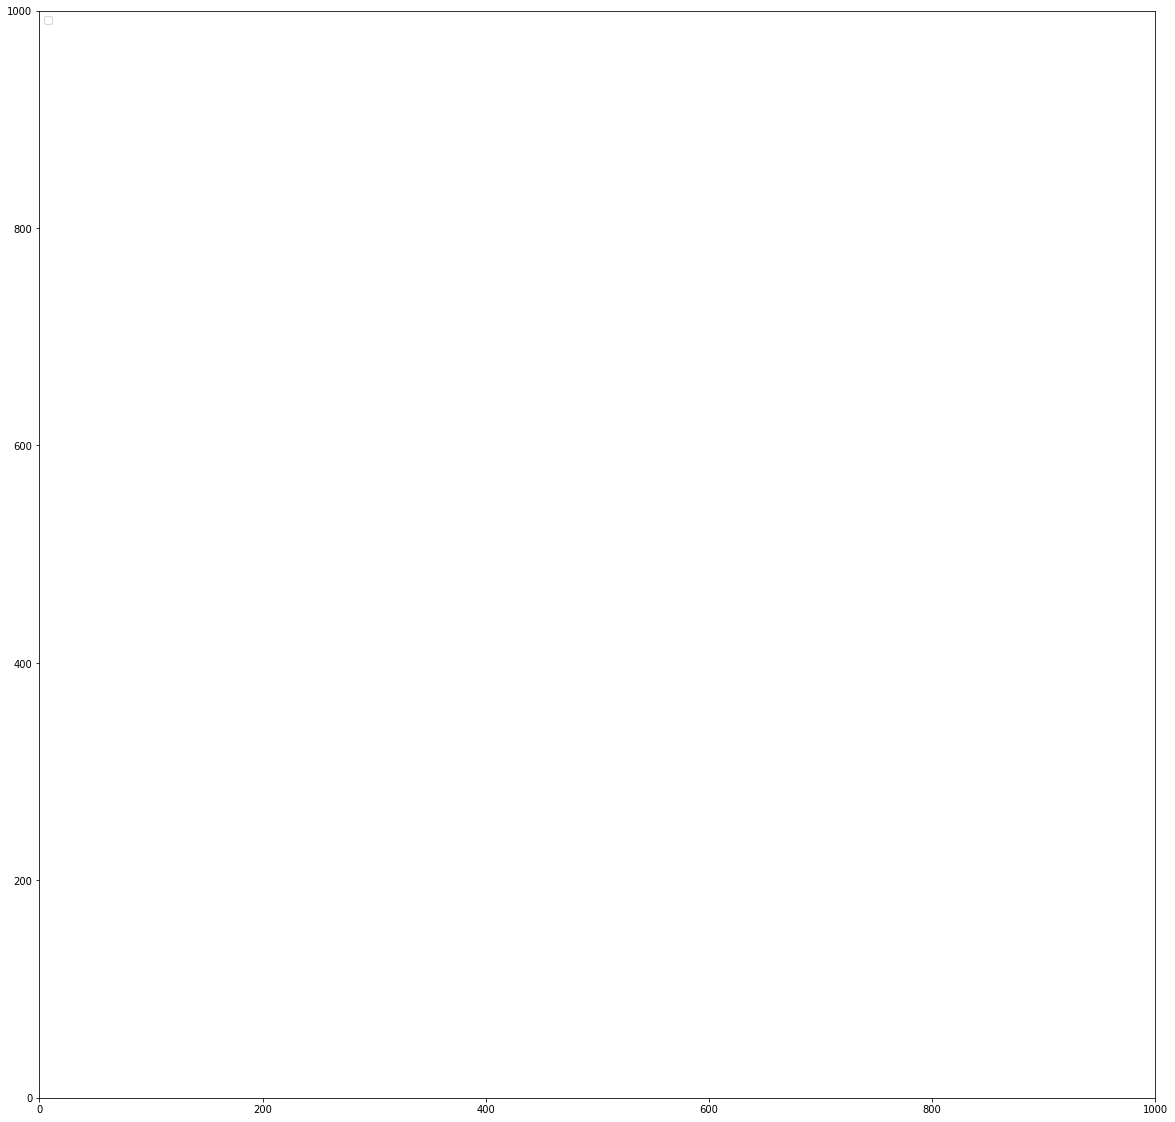

In [88]:
fare_min=features_df[features_df['label']==1]['meter_waiting']
fare=features_df[features_df['label']==1]['meter_waiting_fare']
print(fare.mean(),fare.std())
fare_min2=features_df[features_df['label']==0]['meter_waiting']
fare2=features_df[features_df['label']==0]['meter_waiting_fare']
print(fare2.mean(),fare2.std())
# meter_waiting	meter_waiting_fare
fig1 = plt.figure(figsize=(20,20))
fig2=plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(111)
ax2=fig2.add_subplot(111)
ax1.scatter(fare_min, fare, c='b', marker="x", label='per_min')
ax1.set_xlim(0,1000)
ax2.set_xlim(0,1000)
ax1.set_ylim(0,1000)
ax2.set_ylim(0,1000)
ax1.scatter(fare_min2,fare2, c='r', marker="o", label='Per_min2')
plt.legend(loc='upper left');
plt.show()

In [0]:
features=['additional_fare','duration','meter_waiting','meter_waiting_fare','fare','dist','Fare_per_dist','Fare_per_min']
num_features=['additional_fare','duration','meter_waiting','meter_waiting_fare','fare','dist','Fare_per_dist','Fare_per_min']
# cat_features=['Time_type']
